In [1]:
# I create a new notebook so import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import Data
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
display(customer_df.head())
display(customer_df.tail())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [3]:
#Checking NaN Values
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
#Standarizing Headers 
def standardize_header(dataframe):
    dataframe.columns = [c.lower().replace(' ', '_') for c in dataframe.columns]

standardize_header(customer_df)

In [5]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df = customer_df.rename(columns={'employmentstatus':'employment_status'})

In [7]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
#Checking Dtypes
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [9]:
#Splitting into Categorical and Numerical variables
categorical_df = customer_df.select_dtypes('object')
numerical_df = customer_df.select_dtypes(np.number)

In [10]:
# Cleaning Categoricals
categorical_df

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [11]:
for col in categorical_df.columns:
    print(categorical_df[col].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Co

In [12]:
# Converting the date into datetime format
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])

In [13]:
#Dropping Customer because it doenst give us any info
categorical_df = categorical_df.drop(['customer'], axis = 1)

In [14]:
# education grouped Master degree and Doctor's degree into Masters
categorical_df["education"] = np.where(categorical_df.education.isin(['Master','Doctor']),'Masters', categorical_df.education)
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Masters                 1083
Name: education, dtype: int64

In [15]:
#in 'employment status' : we are grouping medical leaves, disabled and retires in the category 'other'
categorical_df['employment_status'] = np.where(categorical_df['employment_status'].isin(['Medical Leave','Disabled','Retired']) , 'Other', categorical_df['employment_status'])
categorical_df['employment_status'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employment_status, dtype: int64

In [16]:
#in 'policy' we have 9 categories that we can actually group on 3 (L1,L2 and L3) and still have the same info
categorical_df['policy'] = categorical_df['policy'].str.replace("\w* ",' ')
categorical_df['policy'].value_counts()

C:\Users\ChristianGardel\AppData\Local\Temp\ipykernel_3504\1708662926.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical_df['policy'] = categorical_df['policy'].str.replace("\w* ",' ')


 L3    4588
 L2    2881
 L1    1665
Name: policy, dtype: int64

In [17]:
#in 'vehicule_class' : we group 'luxury SUV', 'Sports' and 'Luxury cars' into a 'premium' category
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].fillna('Premium')
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Luxury SUV','Luxury Car','Sports Car']) , 'Premium', categorical_df['vehicle_class'])
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Premium           831
Name: vehicle_class, dtype: int64

In [18]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state              9134 non-null   object        
 1   response           9134 non-null   object        
 2   coverage           9134 non-null   object        
 3   education          9134 non-null   object        
 4   effective_to_date  9134 non-null   datetime64[ns]
 5   employment_status  9134 non-null   object        
 6   gender             9134 non-null   object        
 7   location_code      9134 non-null   object        
 8   marital_status     9134 non-null   object        
 9   policy_type        9134 non-null   object        
 10  policy             9134 non-null   object        
 11  renew_offer_type   9134 non-null   object        
 12  sales_channel      9134 non-null   object        
 13  vehicle_class      9134 non-null   object        
 14  vehicle_

In [19]:
categorical_df

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


In [20]:
categorical_df.dtypes

state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employment_status            object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


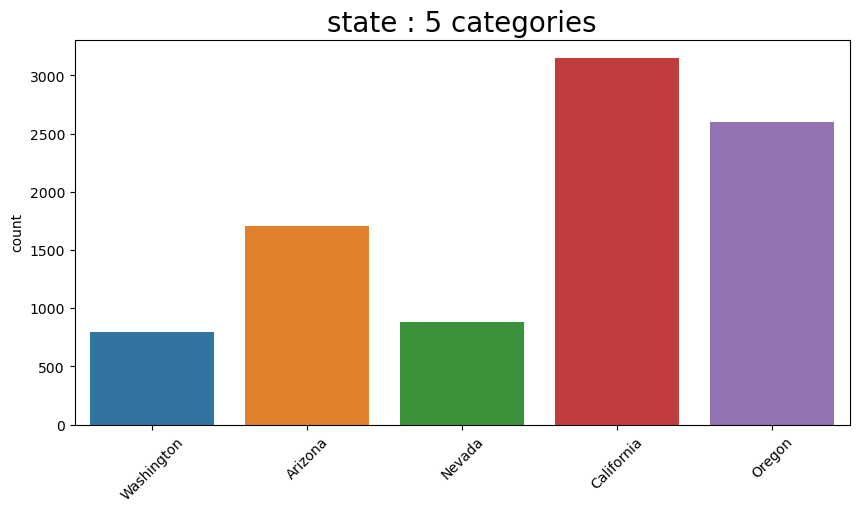

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


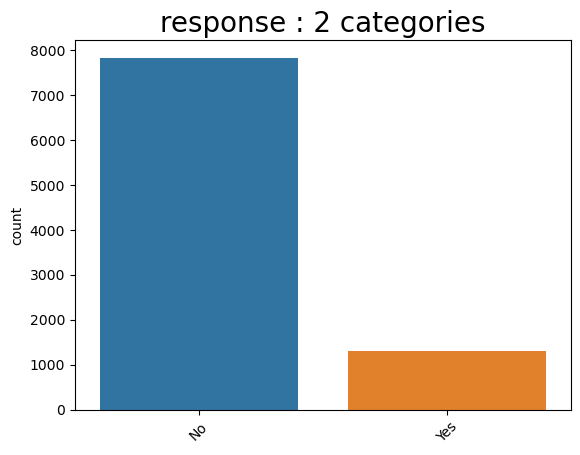

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


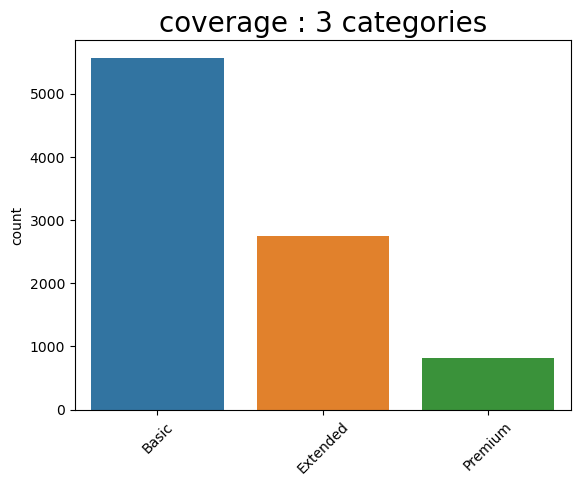

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


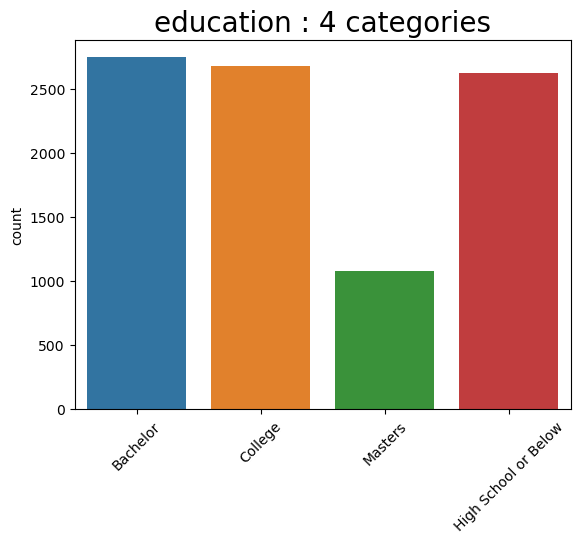

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


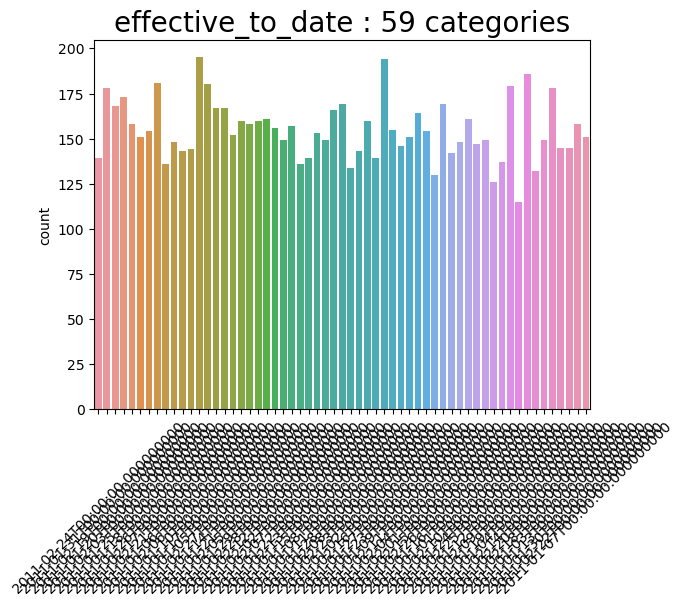

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


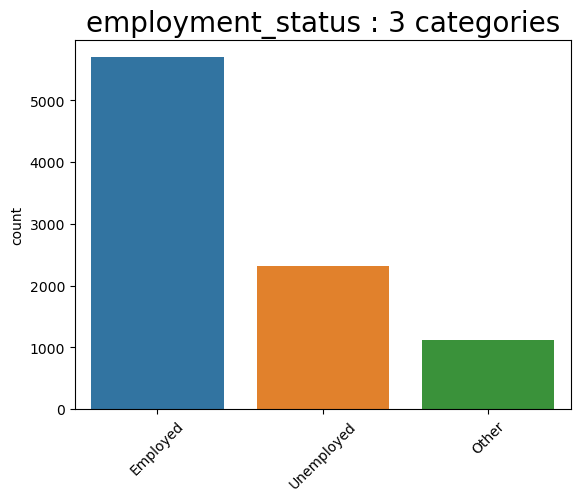

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


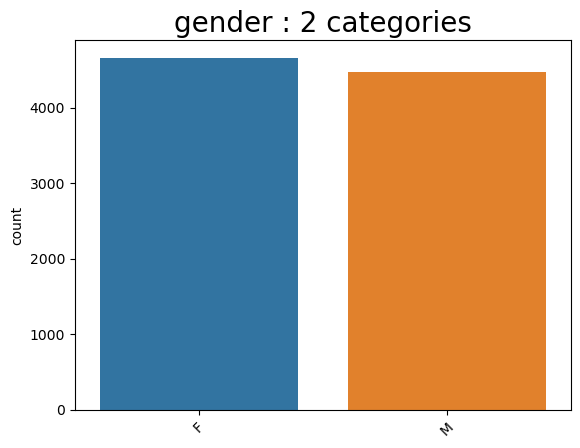

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


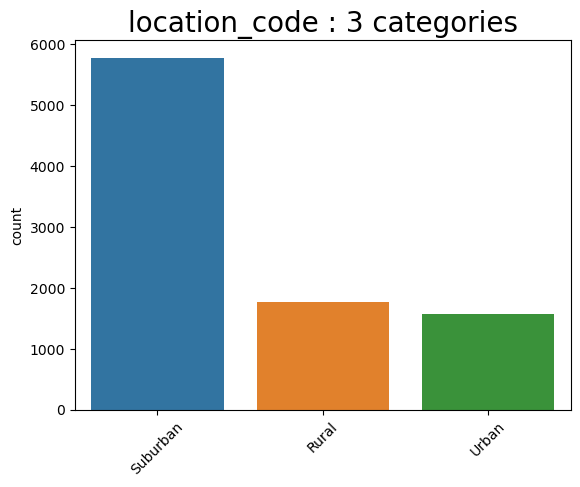

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


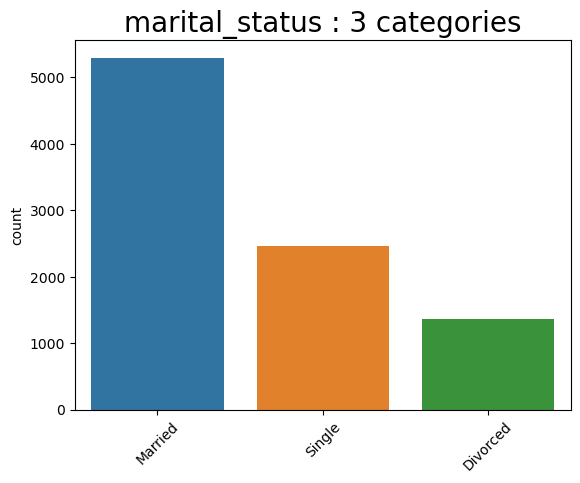

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


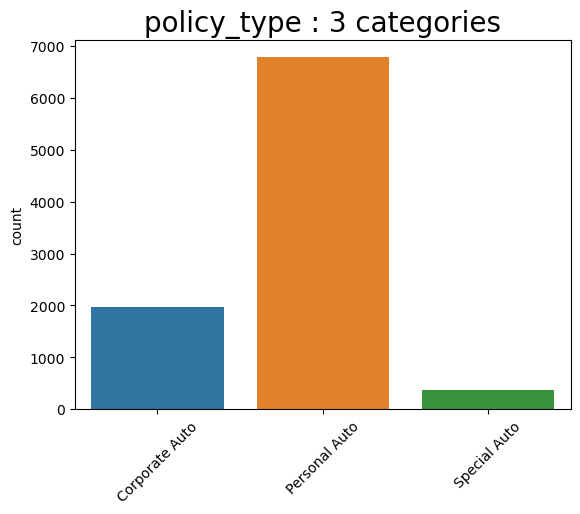

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


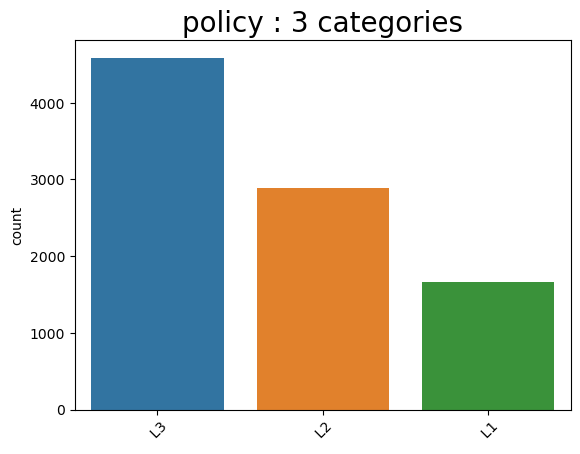

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


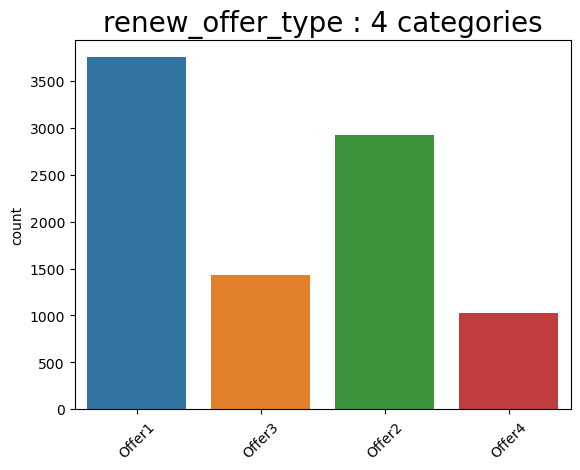

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


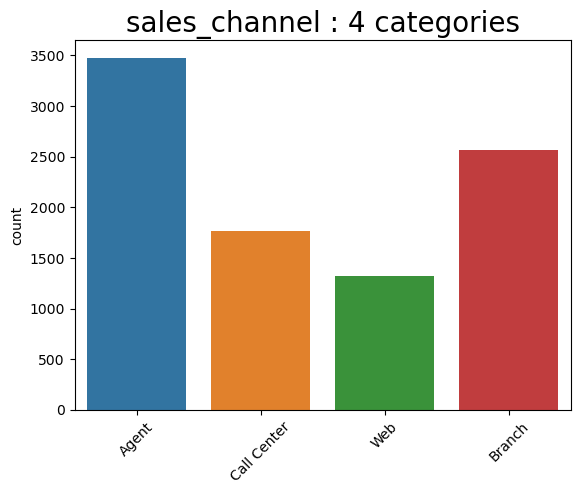

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


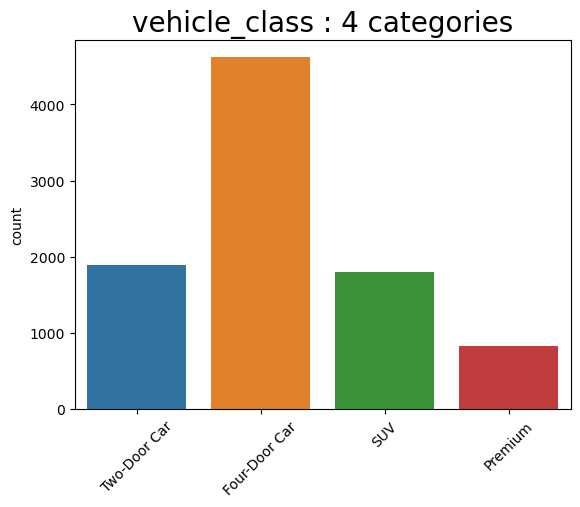

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


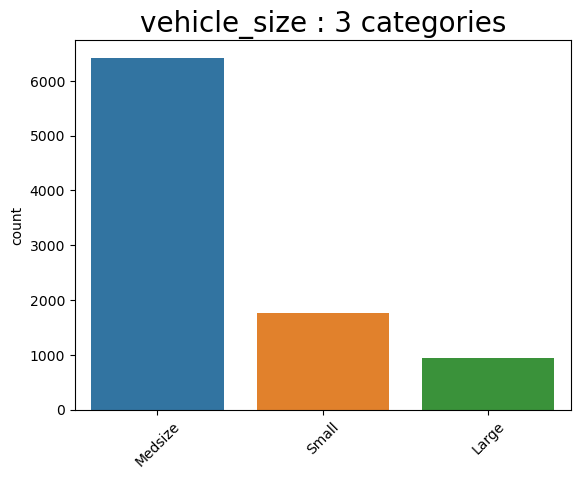

In [21]:
# Plotting the Categorical Variables into Graphs 
def cntplot_cat(df):
    for col in df.columns:
        title = f"{col} : {len(df[col].unique())} categories"
        sns.countplot(df[col])
        plt.xticks(rotation=45)
        plt.xlabel(None)          
        plt.title(title,fontsize=20)
        plt.show()
    return None
   
plt.figure(figsize = (10,5))
cntplot_cat(categorical_df)

In [22]:
# Cleaning numerical 
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [23]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [24]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [25]:
for col in numerical_df.columns:
    print(len(numerical_df[col].unique()))

8041
5694
202
36
100
6
9
5106


In [26]:
# Continuous and Discrete lists
discrete_list = []
continuous_list = []
for col in numerical_df.columns:
    if len(numerical_df[col].unique()) < (customer_df.shape[0] * 0.03):
        discrete_list.append(col)
    else: 
        continuous_list.append(col)
display(discrete_list)
display(continuous_list) 

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

['customer_lifetime_value', 'income', 'total_claim_amount']

In [27]:
def c_d_dif(df):
    discrete_list = []
    continuous_list = []
    for col in df.columns:
        if len(df[col].unique()) < (customer_df.shape[0] * 0.03):
            discrete_list.append(col)
        else: 
            continuous_list.append(col)
    return discrete_list,continuous_list

In [28]:
discrete_list,continuous_list = c_d_dif(numerical_df)

In [29]:
discrete_df = numerical_df[discrete_list]
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [30]:
continuous_df = numerical_df[continuous_list]
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


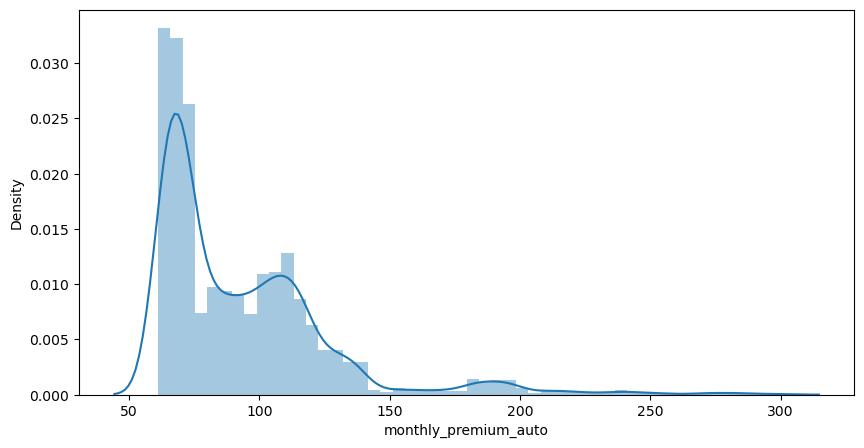

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


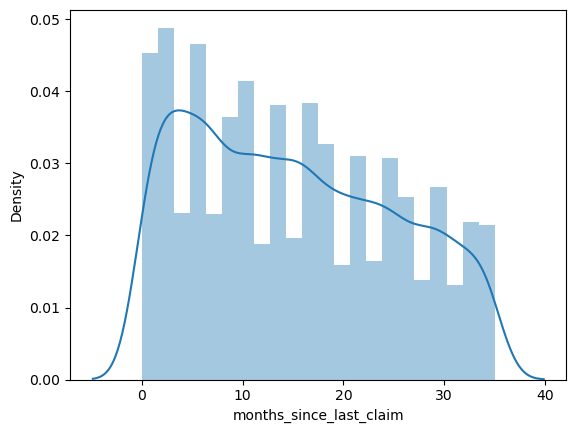

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


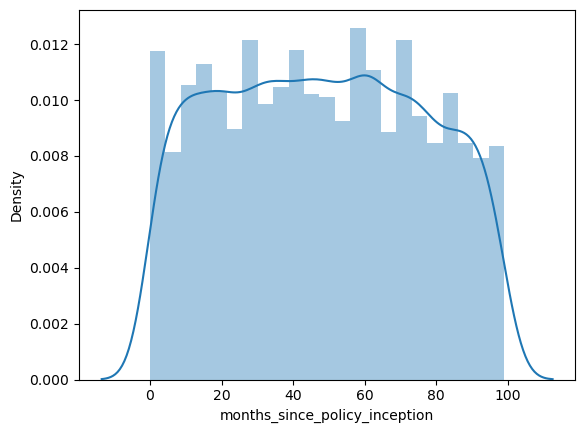

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


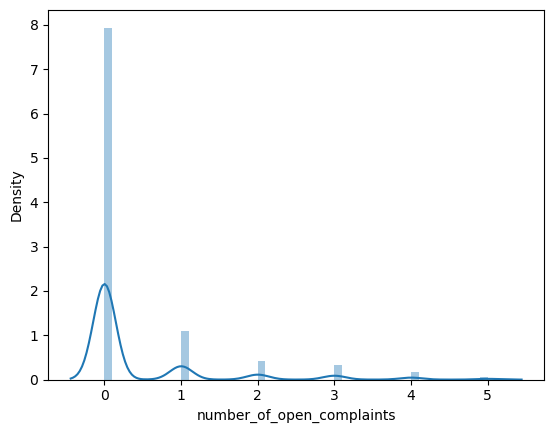

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


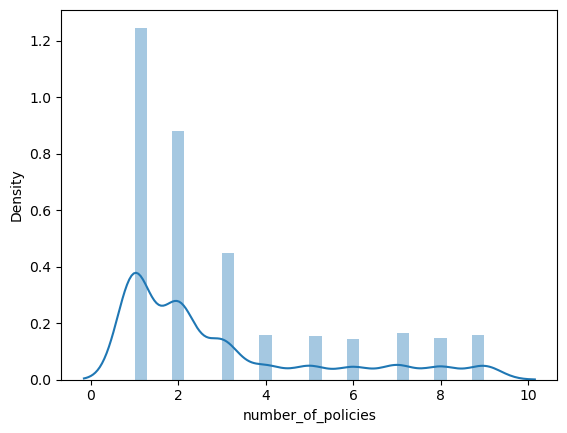

In [31]:
# Plotting the Numerical Variables into Graphs 
# Discrete Variables Plots
plt.figure(figsize = (10,5))
for column in numerical_df[discrete_list]:
    sns.distplot(numerical_df[column])
    plt.show()

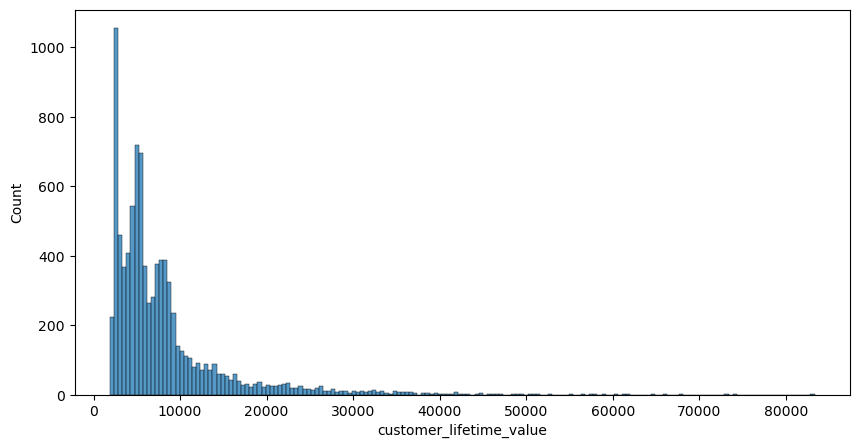

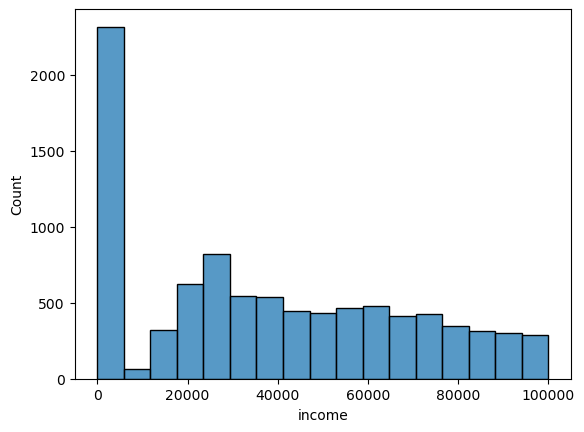

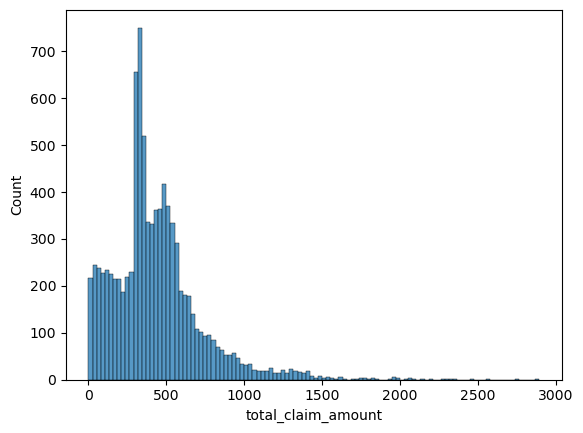

In [32]:
# Continuous Variables Plots
plt.figure(figsize = (10,5))
for column in numerical_df[continuous_list]:
    sns.histplot(numerical_df[column])
    plt.show()

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


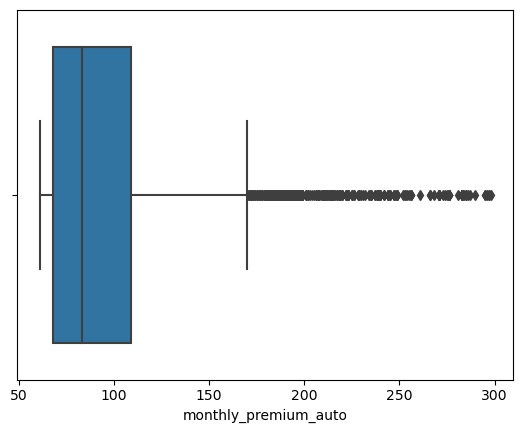

In [33]:
# I am checking discrete where i found outliers. (monthly_premium_auto)
sns.boxplot(numerical_df['monthly_premium_auto'])
plt.show()

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


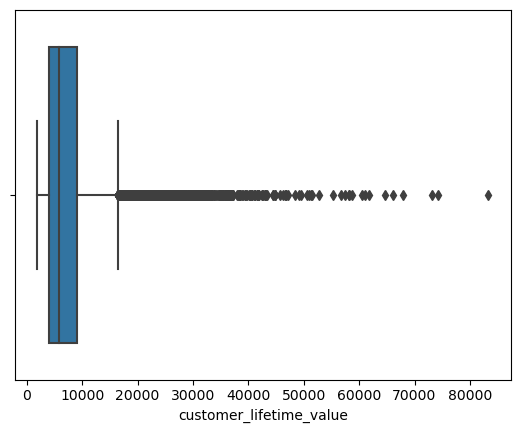

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


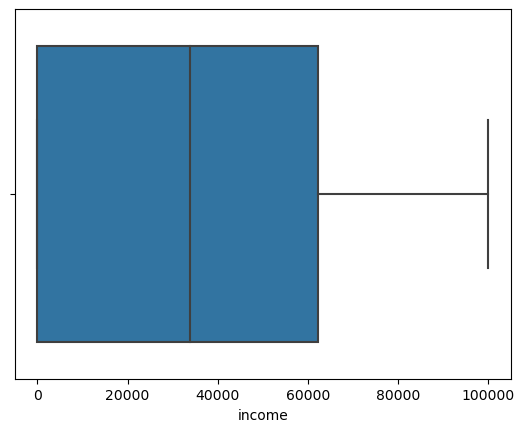

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


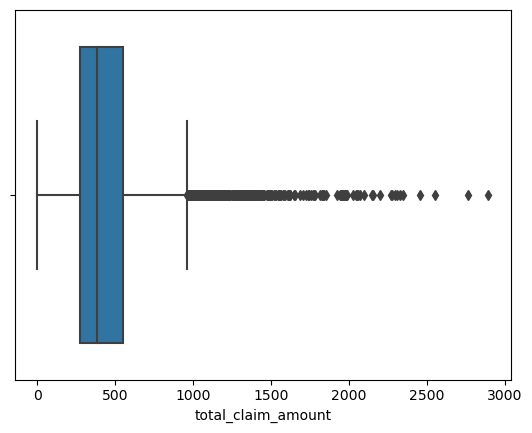

In [34]:
# I am checking for the continuous where i found outliers.
for column in numerical_df[continuous_list]:
    sns.boxplot(numerical_df[column])
    plt.show()

In [35]:
# To deal with the Outliers we can just remove them with the iqr approach as in this example: 
iqr = np.percentile(numerical_df['monthly_premium_auto'],75) - np.percentile(numerical_df['monthly_premium_auto'],25)
upper_limit = np.percentile(numerical_df['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(numerical_df['monthly_premium_auto'],25) - 1.5*iqr

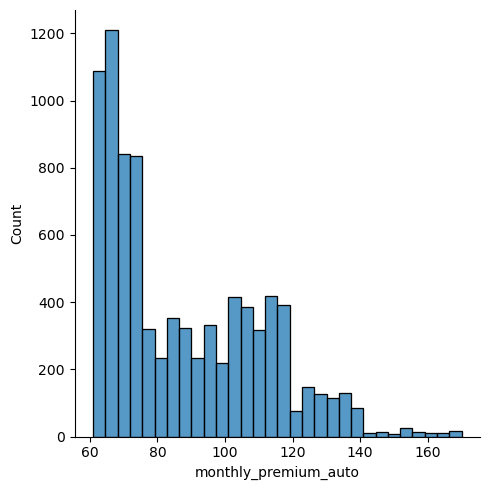

In [36]:
no_outliers = numerical_df[(numerical_df['monthly_premium_auto']>lower_limit) & (numerical_df['monthly_premium_auto']<upper_limit)].copy()
sns.displot(no_outliers['monthly_premium_auto'])
plt.show()

In [37]:
iqr = np.percentile(numerical_df['customer_lifetime_value'],75) - np.percentile(numerical_df['customer_lifetime_value'],25)
upper_limit = np.percentile(numerical_df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(numerical_df['customer_lifetime_value'],25) - 1.5*iqr

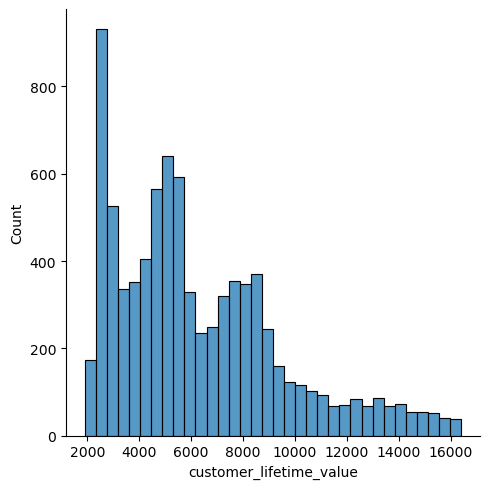

In [38]:
no_outliers = numerical_df[(numerical_df['customer_lifetime_value']>lower_limit) & (numerical_df['customer_lifetime_value']<upper_limit)].copy()
sns.displot(no_outliers['customer_lifetime_value'])
plt.show()

In [39]:
iqr = np.percentile(numerical_df['income'],75) - np.percentile(numerical_df['income'],25)
upper_limit = np.percentile(numerical_df['income'],75) + 1.5*iqr
lower_limit = np.percentile(numerical_df['income'],25) - 1.5*iqr

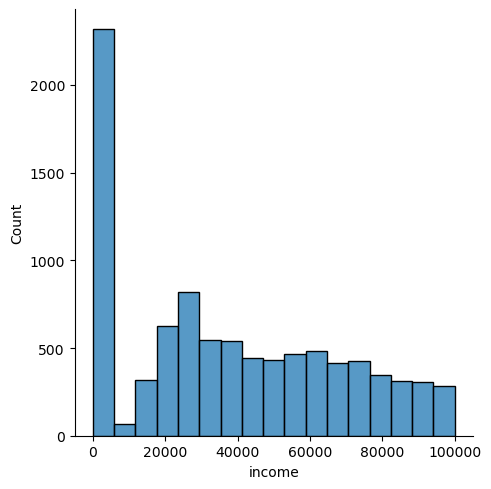

In [40]:
no_outliers = numerical_df[(numerical_df['income']>lower_limit) & (numerical_df['income']<upper_limit)].copy()
sns.displot(no_outliers['income'])
plt.show()

In [41]:
iqr = np.percentile(numerical_df['total_claim_amount'],75) - np.percentile(numerical_df['total_claim_amount'],25)
upper_limit = np.percentile(numerical_df['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(numerical_df['total_claim_amount'],25) - 1.5*iqr

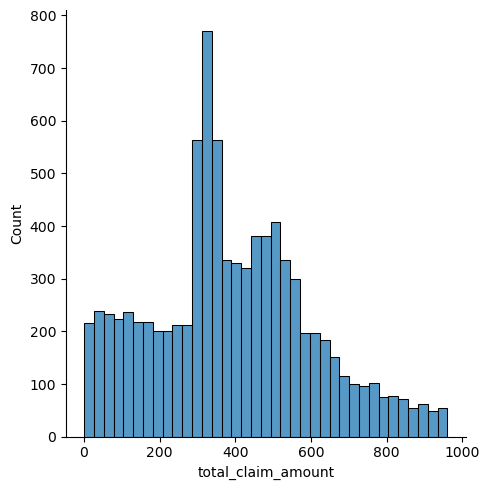

In [42]:
no_outliers = numerical_df[(numerical_df['total_claim_amount']>lower_limit) & (numerical_df['total_claim_amount']<upper_limit)].copy()
sns.displot(no_outliers['total_claim_amount'])
plt.show()

In [43]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [44]:
no_outliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# Lab | Comparing regression models

In [45]:
# Concatenate Numerical and Categorical dataframes into one dataframe called data.
data = pd.concat([categorical_df, no_outliers], axis=1)
data = data.dropna(axis=0)
display(data.shape)
display(data.head())
display(data.tail())

(8681, 23)

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879
5,Oregon,Yes,Basic,Bachelor,2011-01-25,Employed,F,Rural,Married,Personal Auto,...,Two-Door Car,Medsize,8256.297800,62902.0,69.0,14.0,94.0,0.0,2.0,159.383042


,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,23405.987980,71941.0,73.0,18.0,89.0,0.0,2.0,198.234764
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,...,Four-Door Car,Medsize,3096.511217,21604.0,79.0,14.0,28.0,0.0,1.0,379.200000
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,8163.890428,0.0,85.0,9.0,37.0,3.0,2.0,790.784983
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,...,Four-Door Car,Large,7524.442436,21941.0,96.0,34.0,3.0,0.0,3.0,691.200000
9133,California,No,Extended,College,2011-02-14,Unemployed,M,Suburban,Single,Corporate Auto,...,Two-Door Car,Medsize,2611.836866,0.0,77.0,3.0,90.0,0.0,1.0,369.600000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8681 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          8681 non-null   object        
 1   response                       8681 non-null   object        
 2   coverage                       8681 non-null   object        
 3   education                      8681 non-null   object        
 4   effective_to_date              8681 non-null   datetime64[ns]
 5   employment_status              8681 non-null   object        
 6   gender                         8681 non-null   object        
 7   location_code                  8681 non-null   object        
 8   marital_status                 8681 non-null   object        
 9   policy_type                    8681 non-null   object        
 10  policy                         8681 non-null   object        
 11  renew_offer_type 

In [47]:
data.dtypes

state                                    object
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
location_code                            object
marital_status                           object
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
vehicle_class                            object
vehicle_size                             object
customer_lifetime_value                 float64
income                                  float64
monthly_premium_auto                    float64
months_since_last_claim                 float64
months_since_policy_inception           float64
number_of_open_complaints               

In [48]:
for col in data.columns:
    print(data[col].unique())

['Washington' 'Nevada' 'California' 'Oregon' 'Arizona']
['No' 'Yes']
['Basic' 'Premium' 'Extended']
['Bachelor' 'College' 'Masters' 'High School or Below']
['2011-02-24T00:00:00.000000000' '2011-02-19T00:00:00.000000000'
 '2011-01-20T00:00:00.000000000' '2011-02-03T00:00:00.000000000'
 '2011-01-25T00:00:00.000000000' '2011-01-18T00:00:00.000000000'
 '2011-01-26T00:00:00.000000000' '2011-02-17T00:00:00.000000000'
 '2011-02-21T00:00:00.000000000' '2011-01-06T00:00:00.000000000'
 '2011-02-06T00:00:00.000000000' '2011-01-10T00:00:00.000000000'
 '2011-01-17T00:00:00.000000000' '2011-01-05T00:00:00.000000000'
 '2011-02-27T00:00:00.000000000' '2011-01-14T00:00:00.000000000'
 '2011-01-21T00:00:00.000000000' '2011-02-05T00:00:00.000000000'
 '2011-01-29T00:00:00.000000000' '2011-02-28T00:00:00.000000000'
 '2011-02-12T00:00:00.000000000' '2011-02-02T00:00:00.000000000'
 '2011-02-07T00:00:00.000000000' '2011-01-22T00:00:00.000000000'
 '2011-02-13T00:00:00.000000000' '2011-01-15T00:00:00.000000000'

#### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.



In [49]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

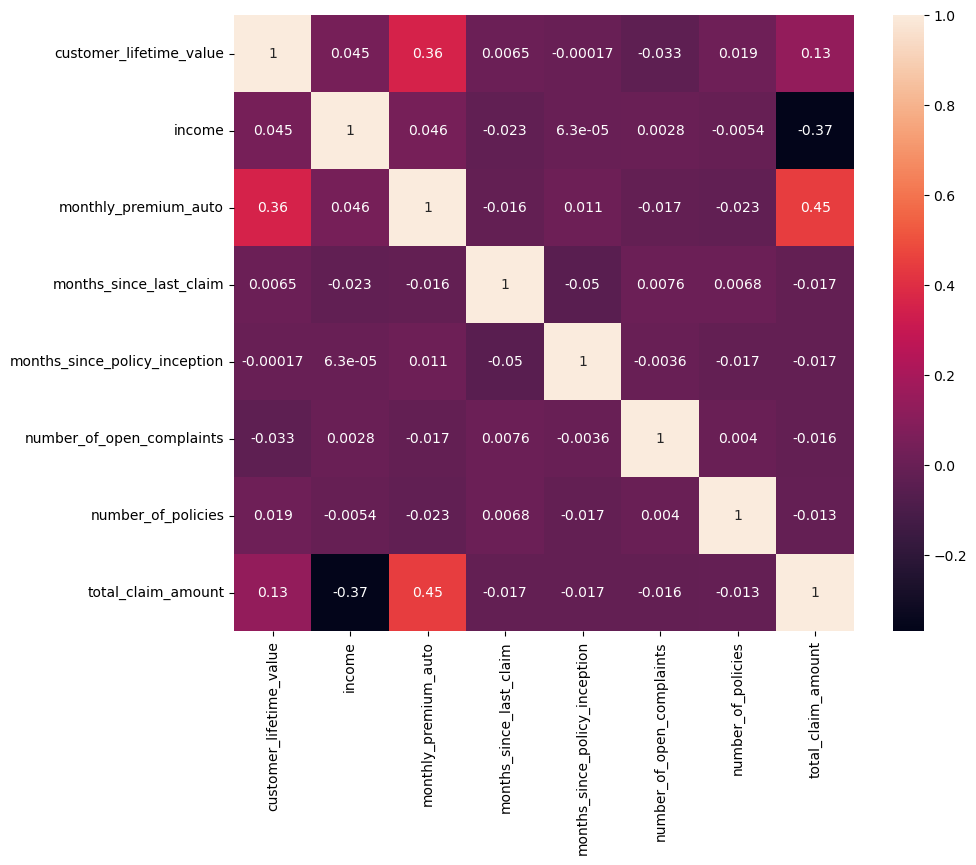

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr()  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#### 2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [226]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1224)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(6944, 22)

(1737, 22)

(6944,)

(1737,)

In [228]:
X_train_cat = X_train.select_dtypes(['object'])
X_test_cat = X_test.select_dtypes(['object'])

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

display(X_train_cat.shape)
display(X_test_cat.shape)
display(X_train_num.shape)
display(X_test_num.shape)

(6944, 14)

(1737, 14)

(6944, 7)

(1737, 7)

#### 3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [229]:
transformer = MinMaxScaler().fit(X_train_num)
x_train_num_norm = transformer.transform(X_train_num)
print(x_train_num_norm.shape)
x_train_num_norm
pd.DataFrame(x_train_num_norm, columns=X_train_num.columns)

(6944, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.088784,0.961803,0.153191,0.257143,0.919192,0.0,0.375
1,0.041982,0.761715,0.234043,0.428571,0.808081,0.0,0.000
2,0.060022,0.386914,0.055319,0.028571,0.222222,0.0,0.625
3,0.015505,0.620298,0.051064,0.057143,0.595960,0.0,0.000
4,0.077496,0.921245,0.114894,0.200000,0.383838,0.0,0.500
...,...,...,...,...,...,...,...
6939,0.011888,0.634831,0.025532,0.000000,0.717172,0.0,0.000
6940,0.062445,0.686710,0.068085,0.200000,0.606061,0.0,0.875
6941,0.074438,0.000000,0.008511,0.000000,0.888889,0.2,0.125
6942,0.055296,0.678109,0.034043,0.028571,0.787879,0.0,1.000


In [230]:
x_test_num_norm = transformer.transform(X_test_num)
print(x_test_num_norm.shape)
x_test_num_norm
pd.DataFrame(x_test_num_norm, columns=X_test_num.columns)

(1737, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.045830,0.614807,0.008511,0.457143,0.656566,1.0,0.250
1,0.029451,0.279113,0.174468,0.142857,0.575758,0.0,0.000
2,0.027736,0.000000,0.187234,0.371429,0.222222,0.0,0.000
3,0.117115,0.712825,0.080851,0.800000,0.858586,0.0,0.125
4,0.324152,0.864974,0.017021,0.257143,0.696970,0.0,0.125
...,...,...,...,...,...,...,...
1732,0.102934,0.977866,0.046809,0.628571,0.141414,0.0,0.125
1733,0.187497,0.000000,0.097872,1.000000,0.424242,0.0,0.125
1734,0.011481,0.834759,0.021277,0.571429,0.181818,0.0,0.000
1735,0.368121,0.184985,0.221277,0.285714,0.151515,0.0,0.125


#### 4. Encode the categorical variables X_train_cat and X_test_cat

In [231]:
# One hot encoding for the following variables: 'state','marital_status','policy_type','policy','renew_offer_type','sales_channel' & 'vehicle_class'
onehot_train = X_train_cat.drop(['coverage','employment_status','location_code','vehicle_size'],axis = 1)
onehot_test = X_test_cat.drop(['coverage','employment_status','location_code','vehicle_size'],axis = 1)

In [232]:
encoder = OneHotEncoder(handle_unknown ='error', drop='first').fit(onehot_train)
X_train_cat_encoded  = encoder.transform(onehot_train).toarray()
X_test_cat_encoded = encoder.transform(onehot_test).toarray()

In [233]:
# Ordinal encoding for: reponse, coverage, employment status, location code and vehicle size 
ordinal_train = X_train_cat.drop(['state','education','gender','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'],axis = 1)
ordinal_test = X_test_cat.drop(['state','education','gender','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'],axis = 1)
ordinal_train.head()
ordinal_test.head()

,response,coverage,employment_status,location_code,vehicle_size
899,No,Basic,Employed,Suburban,Small
5335,No,Premium,Other,Suburban,Medsize
1169,No,Premium,Unemployed,Suburban,Medsize
5854,No,Extended,Employed,Urban,Medsize
4849,No,Basic,Employed,Urban,Small


In [234]:
ordinal_train['response'].value_counts()

No     5942
Yes    1002
Name: response, dtype: int64

In [235]:
ordinal_test['response'].value_counts()

No     1491
Yes     246
Name: response, dtype: int64

In [236]:
enc = OrdinalEncoder()
ordinal_train[['response']] = enc.fit_transform(ordinal_train[['response']])
ordinal_test[['response']] = enc.fit_transform(ordinal_test[['response']])

In [237]:
ordinal_train['response'].value_counts()

0.0    5942
1.0    1002
Name: response, dtype: int64

In [238]:
ordinal_test['response'].value_counts()

0.0    1491
1.0     246
Name: response, dtype: int64

In [239]:
ordinal_train['coverage'].value_counts()

Basic       4386
Extended    2009
Premium      549
Name: coverage, dtype: int64

In [240]:
ordinal_test['coverage'].value_counts()

Basic       1056
Extended     547
Premium      134
Name: coverage, dtype: int64

In [241]:
def coverage(x):
    if 'Basic' in x:
        return '0'
    elif 'Extended' in x:
        return '1'
    else:
        return '2'
    
ordinal_train['coverage'] = ordinal_train['coverage'].apply(coverage)
ordinal_test['coverage'] = ordinal_test['coverage'].apply(coverage)

In [242]:
ordinal_train['coverage'].value_counts()

0    4386
1    2009
2     549
Name: coverage, dtype: int64

In [243]:
ordinal_test['coverage'].value_counts()

0    1056
1     547
2     134
Name: coverage, dtype: int64

In [244]:
ordinal_train['employment_status'].value_counts()

Employed      4424
Unemployed    1673
Other          847
Name: employment_status, dtype: int64

In [245]:
ordinal_test['employment_status'].value_counts()

Employed      1124
Unemployed     393
Other          220
Name: employment_status, dtype: int64

In [246]:
def employment_status(x):
    if 'Employed' in x:
        return "0"
    elif 'Unemployed' in x:
        return "1"
    else:
        return '2'
    
ordinal_train['employment_status'] = ordinal_train['employment_status'].apply(employment_status)
ordinal_test['employment_status'] = ordinal_test['employment_status'].apply(employment_status)

In [247]:
ordinal_train['employment_status'].value_counts()

0    4424
1    1673
2     847
Name: employment_status, dtype: int64

In [248]:
ordinal_test['employment_status'].value_counts()

0    1124
1     393
2     220
Name: employment_status, dtype: int64

In [249]:
ordinal_train['location_code'].value_counts()

Suburban    4284
Rural       1399
Urban       1261
Name: location_code, dtype: int64

In [250]:
ordinal_test['location_code'].value_counts()

Suburban    1044
Rural        374
Urban        319
Name: location_code, dtype: int64

In [251]:
def location_code(x):
    if 'Suburban' in x:
        return "0"
    elif 'Rural' in x:
        return "1"
    else:
        return '2'
    
ordinal_train['location_code'] = ordinal_train['location_code'].apply(location_code)
ordinal_test['location_code'] = ordinal_test['location_code'].apply(location_code)

In [252]:
ordinal_train['location_code'].value_counts()

0    4284
1    1399
2    1261
Name: location_code, dtype: int64

In [253]:
ordinal_test['location_code'].value_counts()

0    1044
1     374
2     319
Name: location_code, dtype: int64

In [254]:
ordinal_train['vehicle_size'].value_counts()

Medsize    4935
Small      1311
Large       698
Name: vehicle_size, dtype: int64

In [255]:
ordinal_test['vehicle_size'].value_counts()

Medsize    1185
Small       355
Large       197
Name: vehicle_size, dtype: int64

In [256]:
def vehicle_size(x):
    if 'Medsize' in x:
        return "0"
    elif 'Small' in x:
        return "1"
    else:
        return '2'
    
ordinal_train['vehicle_size'] = ordinal_train['vehicle_size'].apply(vehicle_size)
ordinal_test['vehicle_size'] = ordinal_test['vehicle_size'].apply(vehicle_size)

In [257]:
ordinal_train['vehicle_size'].value_counts()

0    4935
1    1311
2     698
Name: vehicle_size, dtype: int64

In [258]:
ordinal_test['vehicle_size'].value_counts()

0    1185
1     355
2     197
Name: vehicle_size, dtype: int64

In [259]:
ordinal_train.head()

,response,coverage,employment_status,location_code,vehicle_size
5414,0.0,1,0,2,1
6564,1.0,2,0,0,1
3074,0.0,0,0,0,0
5214,0.0,0,0,1,0
7306,0.0,1,0,1,0


In [260]:
ordinal_test.head()

,response,coverage,employment_status,location_code,vehicle_size
899,0.0,0,0,0,1
5335,0.0,2,2,0,0
1169,0.0,2,1,0,0
5854,0.0,1,0,2,0
4849,0.0,0,0,2,1


In [261]:
X_train_processed = np.concatenate((ordinal_train, X_train_cat_encoded,x_train_num_norm), axis=1)
X_test_processed = np.concatenate((ordinal_test, X_test_cat_encoded,x_test_num_norm), axis=1)

#### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [262]:
import datetime
X_train['day_of_week'] = pd.DatetimeIndex(X_train['effective_to_date']).day_of_week
X_train.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day_of_week
5414,Nevada,No,Extended,High School or Below,2011-02-08,Employed,F,Urban,Single,Corporate Auto,...,Four-Door Car,Small,7758.588506,96162.0,97.0,9.0,91.0,0.0,4.0,1
6564,Nevada,Yes,Premium,High School or Below,2011-02-14,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Small,4669.226640,76157.0,116.0,15.0,80.0,0.0,1.0,0
3074,Arizona,No,Basic,Bachelor,2011-01-26,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,5860.018040,38684.0,74.0,1.0,22.0,0.0,6.0,2
5214,California,No,Basic,Bachelor,2011-01-19,Employed,F,Rural,Married,Corporate Auto,...,Two-Door Car,Medsize,2921.490461,62018.0,73.0,2.0,59.0,0.0,1.0,2
7306,California,No,Extended,High School or Below,2011-01-24,Employed,M,Rural,Divorced,Personal Auto,...,Four-Door Car,Medsize,7013.436657,92107.0,88.0,7.0,38.0,0.0,5.0,0


In [263]:
X_train['month_of_year'] = pd.DatetimeIndex(X_train['effective_to_date']).month
X_train.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,...,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day_of_week,month_of_year
5414,Nevada,No,Extended,High School or Below,2011-02-08,Employed,F,Urban,Single,Corporate Auto,...,Small,7758.588506,96162.0,97.0,9.0,91.0,0.0,4.0,1,2
6564,Nevada,Yes,Premium,High School or Below,2011-02-14,Employed,F,Suburban,Married,Personal Auto,...,Small,4669.226640,76157.0,116.0,15.0,80.0,0.0,1.0,0,2
3074,Arizona,No,Basic,Bachelor,2011-01-26,Employed,F,Suburban,Married,Personal Auto,...,Medsize,5860.018040,38684.0,74.0,1.0,22.0,0.0,6.0,2,1
5214,California,No,Basic,Bachelor,2011-01-19,Employed,F,Rural,Married,Corporate Auto,...,Medsize,2921.490461,62018.0,73.0,2.0,59.0,0.0,1.0,2,1
7306,California,No,Extended,High School or Below,2011-01-24,Employed,M,Rural,Divorced,Personal Auto,...,Medsize,7013.436657,92107.0,88.0,7.0,38.0,0.0,5.0,0,1


In [264]:
X_test['day_of_week'] = pd.DatetimeIndex(X_test['effective_to_date']).day_of_week
X_test.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day_of_week
899,California,No,Basic,Bachelor,2011-01-16,Employed,F,Suburban,Married,Personal Auto,...,Four-Door Car,Small,4923.181690,61469.0,63.0,16.0,65.0,5.0,3.0,6
5335,Nevada,No,Premium,College,2011-01-19,Other,M,Suburban,Divorced,Personal Auto,...,Four-Door Car,Medsize,3842.028065,27906.0,102.0,5.0,57.0,0.0,1.0,2
1169,California,No,Premium,High School or Below,2011-02-20,Unemployed,M,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,3728.830130,0.0,105.0,13.0,22.0,0.0,1.0,6
5854,California,No,Extended,Bachelor,2011-01-06,Employed,F,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,9628.702696,71269.0,80.0,28.0,85.0,0.0,2.0,3
4849,Nevada,No,Basic,College,2011-01-27,Employed,F,Urban,Single,Corporate Auto,...,Two-Door Car,Small,23295.060140,86481.0,65.0,9.0,69.0,0.0,2.0,3


In [265]:
X_test['month_of_year'] = pd.DatetimeIndex(X_test['effective_to_date']).month
X_test.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,...,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day_of_week,month_of_year
899,California,No,Basic,Bachelor,2011-01-16,Employed,F,Suburban,Married,Personal Auto,...,Small,4923.181690,61469.0,63.0,16.0,65.0,5.0,3.0,6,1
5335,Nevada,No,Premium,College,2011-01-19,Other,M,Suburban,Divorced,Personal Auto,...,Medsize,3842.028065,27906.0,102.0,5.0,57.0,0.0,1.0,2,1
1169,California,No,Premium,High School or Below,2011-02-20,Unemployed,M,Suburban,Single,Personal Auto,...,Medsize,3728.830130,0.0,105.0,13.0,22.0,0.0,1.0,6,2
5854,California,No,Extended,Bachelor,2011-01-06,Employed,F,Urban,Married,Personal Auto,...,Medsize,9628.702696,71269.0,80.0,28.0,85.0,0.0,2.0,3,1
4849,Nevada,No,Basic,College,2011-01-27,Employed,F,Urban,Single,Corporate Auto,...,Small,23295.060140,86481.0,65.0,9.0,69.0,0.0,2.0,3,1


In [266]:
day_test = X_test[['effective_to_date']]
day_test['day_of_week'] = pd.DatetimeIndex(X_test['effective_to_date']).day_of_week
day_test = day_test.drop(['effective_to_date'], axis = 1)
day_test

C:\Users\ChristianGardel\AppData\Local\Temp\ipykernel_3504\3688765566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_test['day_of_week'] = pd.DatetimeIndex(X_test['effective_to_date']).day_of_week


,day_of_week
899,6
5335,2
1169,6
5854,3
4849,3
...,...
1822,5
4578,2
7670,1
7887,5


In [267]:
month_test = X_test[['effective_to_date']]
month_test['month_of_year'] = pd.DatetimeIndex(X_test['effective_to_date']).month
month_test = month_test.drop(['effective_to_date'], axis = 1)
month_test

C:\Users\ChristianGardel\AppData\Local\Temp\ipykernel_3504\2358586214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_test['month_of_year'] = pd.DatetimeIndex(X_test['effective_to_date']).month


,month_of_year
899,1
5335,1
1169,2
5854,1
4849,1
...,...
1822,1
4578,2
7670,1
7887,1


In [268]:
day_train = X_train[['effective_to_date']]
day_train['day_of_week'] = pd.DatetimeIndex(X_train['effective_to_date']).day_of_week
day_train = day_train.drop(['effective_to_date'], axis = 1)
day_train

C:\Users\ChristianGardel\AppData\Local\Temp\ipykernel_3504\4168048991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_train['day_of_week'] = pd.DatetimeIndex(X_train['effective_to_date']).day_of_week


,day_of_week
5414,1
6564,0
3074,2
5214,2
7306,0
...,...
5874,0
6418,6
7327,4
585,3


In [269]:
month_train = X_train[['effective_to_date']]
month_train['month_of_year'] = pd.DatetimeIndex(X_train['effective_to_date']).month
month_train = month_train.drop(['effective_to_date'], axis = 1)
month_train

C:\Users\ChristianGardel\AppData\Local\Temp\ipykernel_3504\611900359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_train['month_of_year'] = pd.DatetimeIndex(X_train['effective_to_date']).month


,month_of_year
5414,2
6564,2
3074,1
5214,1
7306,1
...,...
5874,2
6418,1
7327,2
585,1


#### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [270]:
X_train_processed = np.concatenate((ordinal_train, X_train_cat_encoded,x_train_num_norm,day_train,month_train), axis=1)
X_test_processed = np.concatenate((ordinal_test, X_test_cat_encoded,x_test_num_norm,day_test,month_test), axis=1)

#### 7. Try a simple linear regression with all the data to see whether we are getting good results.


In [271]:
lm = linear_model.LinearRegression()
lm.fit(X_train_processed,y_train)

LinearRegression()

In [272]:
predictions_train = lm.predict(X_train_processed)
r2_score(y_train, predictions_train)

0.5154617171545672

In [283]:
predictions_test = lm.predict(X_test_processed)
r2_score(y_test, predictions_test)

0.49288979681753087

#### 8. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

#### 9. Use the function to check LinearRegressor and KNeighborsRegressor.

In [284]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train_processed, y_train)

KNeighborsRegressor(n_neighbors=6)

In [286]:
score = KNN.score(X_train_processed, y_train)
score

0.676780288676597

In [285]:
score = KNN.score(X_test_processed, y_test)
score

0.5387769408711188

#### 10 . You can check also the MLPRegressor for this task!

In [287]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=200).fit(X_train_processed, y_train)

C:\Users\ChristianGardel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [290]:
regr.score(X_train_processed, y_train)

0.6488771553117139

In [289]:
regr.score(X_test_processed, y_test)

0.6355138873697248

#### 11 . Discuss the results

The MLPRegressor is performing far better than the other 2 approaches, we get a bit better train score with KNN but the test score is far better with MLPRegressor. 